In [268]:
# 기본 세팅
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.stats import gaussian_kde
from matplotlib import colors as mpl_colors
import os
from matplotlib import patheffects
# font = {'family': 'Tahoma'}
font = {'family': 'Times New Roman'}
plt.rc('font', **font)

colors_fill = [None, "#54637C", "#587C86", "#5D928B","#65A68D", "#71B88E", "#83C98F", "#9CD790", "#BBE394", "#D9ED9D", "#F1F4B0", "#FEFAD3"]
model = 'densenet201'


In [269]:
num_total_cores = 8 + 1
base_path = f"../data/data-1114/gpu-accel/{model}/"

# 데이터를 수집할 데이터프레임을 초기화
columns = ['glayer', 'end_glayer', 'throughput', 'frame_rate', 'execution_time', 'cycle_time', 'num_thread_data', 'num_thread', 'accel_gain', 'block_loss']
data_list = []

# Loop through thread counts from 0 to 11
path = f"{base_path}8thread/"

# Check if directory exists
if os.path.exists(path):
    # Read data from files
    for filename in sorted(os.listdir(path)):
        if filename.endswith(".csv"):
            start_glayer = int(filename.split('_')[1])
            end_glayer = int(filename.split('_')[2].replace('.csv', '')) - start_glayer
            df = pd.read_csv(os.path.join(path, filename))
            task_num = len(df)
            start_preprocess_time = df["start_preprocess"].iloc[0]
            end_infer_time = df["end_postprocess"].iloc[-1]
            print(start_glayer, end_glayer)
            Throughput = task_num / (end_infer_time - start_preprocess_time) * 1000
            if(end_glayer == 0):
                infer_time_standard = df["e_infer"].mean() - df["waiting_gpu"].mean()
            acceleration_gain = infer_time_standard - (df["e_infer"].mean() - df["waiting_gpu"].mean())

            block_loss = df["waiting_gpu"].mean()
            
            avg_frame_rate = df["frame_rate"].mean()
            avg_execution_time = df["execution_time"].mean()
            avg_cycle_time = df["cycle_time"].mean()
            avg_num_thread_data = df["num_thread"].mean()
            # 데이터프레임에 데이터 추가
            data_list.append([start_glayer, end_glayer, Throughput, avg_frame_rate, avg_execution_time, avg_cycle_time, avg_num_thread_data, num_thread, acceleration_gain, block_loss])

# 데이터프레임 생성
data_df = pd.DataFrame(data_list, columns=columns)
data_df = data_df.pivot(index='glayer', columns='end_glayer')

frame_rate_df = data_df['frame_rate']
execution_time_df = data_df['execution_time']
cycle_time_df = data_df['cycle_time']

# 파일 경로 설정
frame_rate_file_path = './gpu-accel-GC_frame_rate_data.csv'
execution_time_file_path = './gpu-accel-GC_execution_time_data.csv'
cycle_time_file_path = './gpu-accel-GC_cycle_time_data.csv'

# 파일 저장
frame_rate_df.to_csv(frame_rate_file_path)
execution_time_df.to_csv(execution_time_file_path)
cycle_time_df.to_csv(cycle_time_file_path)

print(frame_rate_file_path, execution_time_file_path, cycle_time_file_path)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


In [270]:
num_total_cores = 8 + 1
#base_path = f"../data/data-1114/gpu-accel/{model}/"
base_path2 = f"../data/data-1114/full-freedom/{model}/"
# 데이터를 수집할 데이터프레임을 초기화
columns = ['glayer', 'end_glayer', 'throughput', 'frame_rate', 'execution_time', 'cycle_time', 'accel_gain', 'block_loss']
data_list = []
i = 0
# Loop through thread counts from 0 to 11
path2 = f"{base_path2}8thread/"
infer_time_standard = 630
# Check if directory exists
if os.path.exists(path2):
    # Read data from files
    for filename in sorted(os.listdir(path2)):
        if filename.endswith(".csv"):
            # if (filename.split('_')[1] == "000.csv"):
            #     print(filename.split('_')[1])
            #     continue
            #start_glayer = int(filename.split('_')[0])
            #end_glayer = int(filename.split('_')[1])
            start_glayer = i
            end_glayer = i
            i += 1
            print(start_glayer, end_glayer)
            df = pd.read_csv(os.path.join(path2, filename))
            task_num = len(df)
            start_preprocess_time = df["start_preprocess"].iloc[0]
            end_infer_time = df["end_postprocess"].iloc[-1]
            #print(start_glayer, end_glayer)
            Throughput = task_num / (end_infer_time - start_preprocess_time) * 1000
            if filename.endswith("000_000.csv"):
                infer_time_standard = df["e_infer"].mean() - df["waiting_gpu"].mean()
            acceleration_gain = infer_time_standard - (df["e_infer"].mean() - df["waiting_gpu"].mean())

            block_loss = df["waiting_gpu"].mean()
            
            avg_frame_rate = df["frame_rate"].mean()
            avg_execution_time = df["execution_time"].mean()
            avg_cycle_time = df["cycle_time"].mean()
            
            # 데이터프레임에 데이터 추가
            data_list.append([start_glayer, end_glayer, Throughput, avg_frame_rate, avg_execution_time, avg_cycle_time, acceleration_gain, block_loss])

# # 데이터프레임 생성
# data_df = pd.DataFrame(data_list, columns=columns)
# data_df = data_df.pivot(index='glayer', columns='end_glayer')

# frame_rate_df = data_df['frame_rate']
# execution_time_df = data_df['execution_time']
# cycle_time_df = data_df['cycle_time']

# # 파일 경로 설정
# frame_rate_file_path = './gpu-accel-GC_frame_rate_data.csv'
# execution_time_file_path = './gpu-accel-GC_execution_time_data.csv'
# cycle_time_file_path = './gpu-accel-GC_cycle_time_data.csv'

# # 파일 저장
# frame_rate_df.to_csv(frame_rate_file_path)
# execution_time_df.to_csv(execution_time_file_path)
# cycle_time_df.to_csv(cycle_time_file_path)
# 데이터프레임 생성
data_df2 = pd.DataFrame(data_list, columns=columns)
#data_df = data_df.pivot(index='glayer', columns='end_glayer')
print(data_df2)
frame_rate_df = data_df2['frame_rate']
execution_time_df = data_df2['execution_time']
cycle_time_df = data_df2['cycle_time']

# 파일 경로 설정
frame_rate_file_path = './gpu-accel-GC_frame_rate_data.csv'
execution_time_file_path = './gpu-accel-GC_execution_time_data.csv'
cycle_time_file_path = './gpu-accel-GC_cycle_time_data.csv'

# 파일 저장
frame_rate_df.to_csv(frame_rate_file_path)
execution_time_df.to_csv(execution_time_file_path)
cycle_time_df.to_csv(cycle_time_file_path)
print(data_df2)
# print(frame_rate_file_path, execution_time_file_path, cycle_time_file_path)

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
148 148
149 149
150 150
151 151
152 

In [271]:
# 결과를 저장할 리스트 초기화
max_values = []

# 각 스레드 수에 대해 반복

if num_thread in data_df['frame_rate'].columns:
    # frame_rate의 최대값 찾기
    max_throughput = np.max(data_df['throughput'])
    # 최대 frame_rate의 인덱스 찾기
    max_index=np.unravel_index(np.nanargmax(data_df['throughput']), data_df['throughput'].shape)    
    # 해당 인덱스의 execution_time 가져오기
    corresponding_execution_time = data_df['execution_time'].loc[max_index]

    # 결과 저장
    max_values.append({
        'X_max': max_index[0],
        'Y_max': max_index[1],
        'max_throughput': max_throughput,
        'execution_time_at_max_fr': corresponding_execution_time
    })

# 결과 출력
print("Point for Max Frame rate")
for result in max_values:
    print(f"X_max: {result['X_max']}, Y_max: {result['Y_max']}, Max Throughput: {result['max_throughput']:.2f}, Execution Time: {result['execution_time_at_max_fr']:.2f}")

Point for Max Frame rate
X_max: 0, Y_max: 190, Max Throughput: 66.78, Execution Time: 114.20


In [272]:
# 결과를 저장할 리스트 초기화
cross_points = []

# 각 스레드 수와 그 다음 스레드 수 비교
for num_thread in range(10, num_total_cores - 1):
    current_thread_frame_rates = data_df['frame_rate'][num_thread]
    next_thread_frame_rates = data_df['frame_rate'][num_thread + 1]
    current_thread_execution_time = data_df['execution_time'][num_thread]
    next_thread_execution_time = data_df['execution_time'][num_thread + 1]
    
    # glayer를 순회하면서 현재 스레드의 frame_rate가 다음 스레드의 frame_rate를 넘는 첫 번째 지점 찾기
    for glayer in current_thread_frame_rates.index:
        if current_thread_frame_rates[glayer] >= next_thread_frame_rates[glayer]:
            cross_points.append({
                'num_thread': num_thread,
                'glayer': glayer,
                'current_frame_rate': current_thread_frame_rates[glayer],
                'next_frame_rate': next_thread_frame_rates[glayer],
                'current_execution_time': current_thread_execution_time[glayer],
                'next_execution_time': next_thread_execution_time[glayer]
            })
            break  # 첫 번째 조건 충족 지점에서 루프 종료

# 결과 출력
for point in cross_points:
    print(f"Thread {point['num_thread']} exceeds Thread {point['num_thread']+1} at Glayer {point['glayer']}:")
    print(f"  Thread {point['num_thread']}: {point['current_frame_rate']:.2f} fps, Thread {point['num_thread']+1}: {point['next_frame_rate']:.2f} fps")
    print(f"  Thread {point['num_thread']}: {point['current_execution_time']:.2f} ms, Thread {point['num_thread']+1}: {point['next_execution_time']:.2f} ms")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


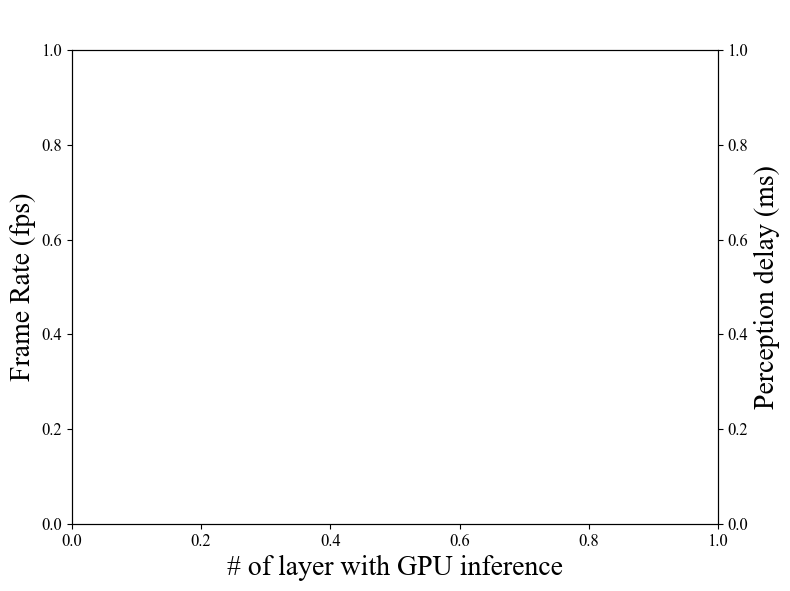

In [273]:
# Set up the plot
fig, (ax1) = plt.subplots(1, 1, figsize=(8, 6))
ax3 = ax1.twinx()

colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

# 각 스레드에 대한 데이터 플롯
for num_thread in range(10, num_total_cores):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        ax3.plot(data_df.index, data_df[('execution_time', num_thread)], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        # if (num_thread == 1) or (num_thread == 2) or (num_thread == num_total_cores):
        #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=-num_thread)
        # else:
        #     exceed_num = cross_points[num_thread - 3]['glayer']
        #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = -num_thread)
        #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=-num_thread)


ax1.set_xlabel('# of layer with GPU inference', size=20)
ax1.set_ylabel("Frame Rate (fps)", size=20)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=4, frameon=False)

ax3.set_ylabel("Perception delay (ms)", size=20)
ax2.set_xlabel('# of layer with GPU inference', size=20)
ax2.set_ylabel('Minimum # of thread', size=20)

ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
ax3.tick_params(axis='both', labelsize=12)
# ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()


IndexError: list index out of range

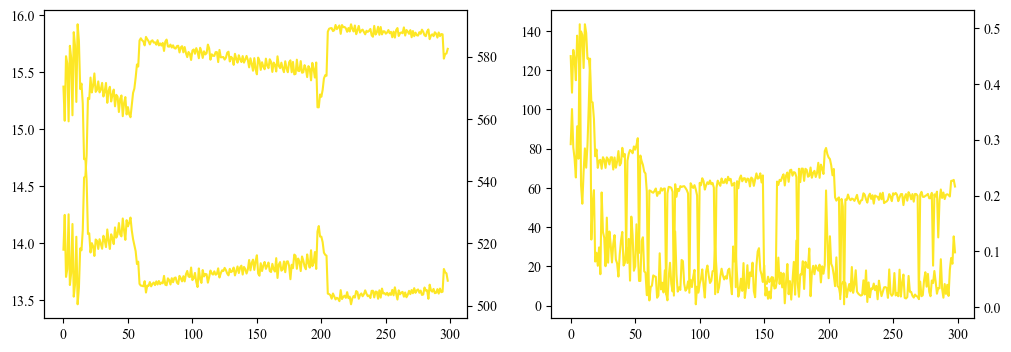

In [274]:
# Set up the plot
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(12, 4))
ax2 = ax1.twinx()
ax4 = ax3.twinx()
colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택
# 각 스레드에 대한 데이터 플롯
for num_thread in range(8, num_total_cores):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        ax1.plot(data_df.index, data_df[('throughput', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        ax2.plot(data_df.index, data_df[('execution_time', num_thread)], color=color, zorder = num_thread)
        ax3.plot(data_df.index, data_df[('accel_gain', num_thread)], color=color, zorder = num_thread)
        ax4.plot(data_df.index, data_df[('block_loss', num_thread)], color=color, zorder = num_thread)
        ax1.axvline(x=max_values[num_thread - 1]['glayer'], color='red', zorder = num_thread, linestyle='--', alpha=0.3)
        ax3.axvline(x=max_values[num_thread - 1]['glayer'], color='red', zorder = num_thread, linestyle='--', alpha=0.3)

        # if (num_thread == 1) or (num_thread == 2) or (num_thread == num_total_cores):
        #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
        # else:
        #     exceed_num = cross_points[num_thread - 3]['glayer']
        #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


# ax1.set_xlabel('# of layer with GPU inference', size=20)
# ax1.set_ylabel("Frame Rate (fps)", size=20)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False)

ax1.set_ylabel("Throughput (Ntask / ms)", size=20)
ax2.set_ylabel("Delay Time (ms)", size = 20)
ax3.set_ylabel("Accel Gain", size=20)
ax2.set_ylabel("Block Loss", size = 20)
ax1.set_xlabel('# of layer with GPU inference', size=20)
ax3.set_xlabel('# of layer with GPU inference', size=20)

# ax2.set_ylabel('Minimum # of thread', size=20)

ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
plt.show()


In [ ]:
#print(data_df)
#print(np.max(data_df[('throughput')]))
#print(data_df[('throughput')].max(axis=1), data_df[('throughput')].idxmax(axis=1))
#print(data_df.index.values)
#print(data_df.columns.get_level_values('end_glayer').unique())
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
Y = np.arange(0, data_df.index[-1] + 1)
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('throughput')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
print(list(max_values[0].values())[2])
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Throughput", size=20)
ax5.view_init(elev=30, azim=300)
ax5.set_title(f"Throughput with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
plt.show()

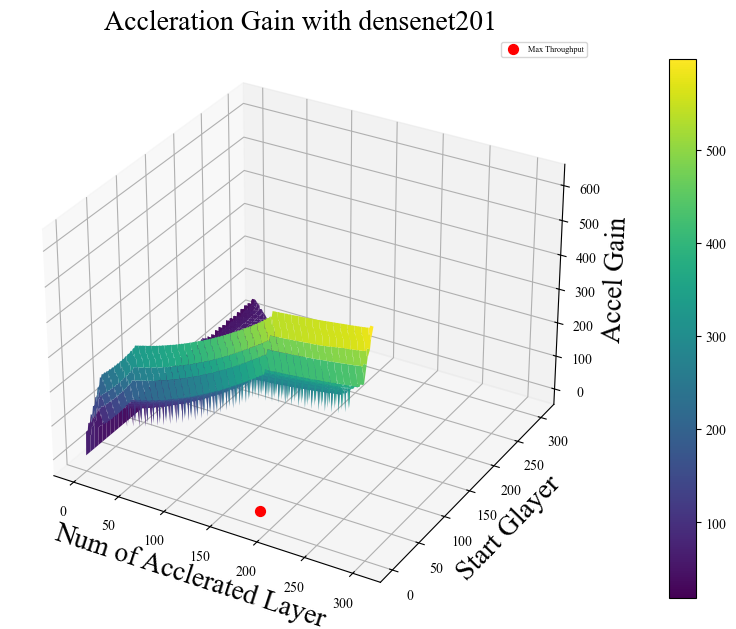

In [275]:
#print(np.max(data_df[('accel_gain')]))
#print(data_df[('accel_gain')].max(axis=1), data_df[('accel_gain')].idxmax(axis=1))
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('accel_gain')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Accel Gain", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Accleration Gain with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
plt.show()

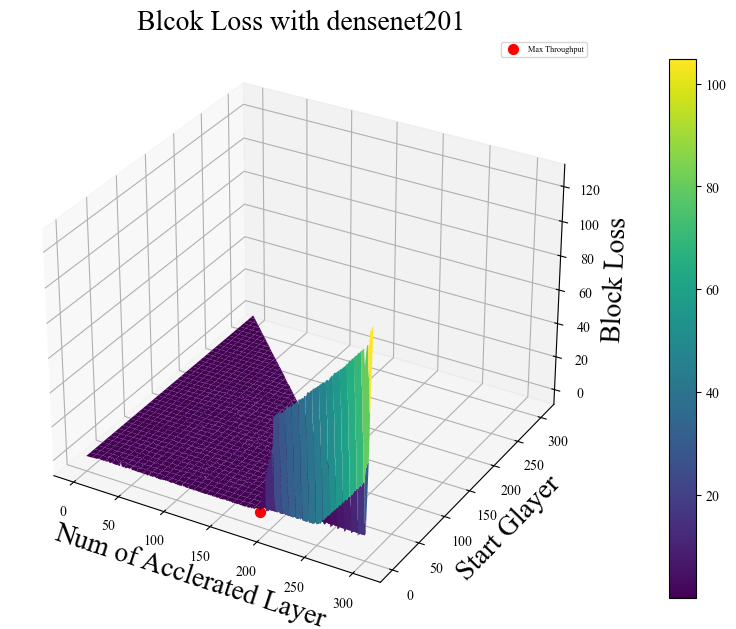

In [276]:
#print(np.max(data_df[('block_loss')]))
#print(data_df[('block_loss')].max(axis=1), data_df[('block_loss')].idxmax(axis=1))
#print(data_df[('block_loss')])
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('block_loss')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Block Loss", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Blcok Loss with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
plt.show()

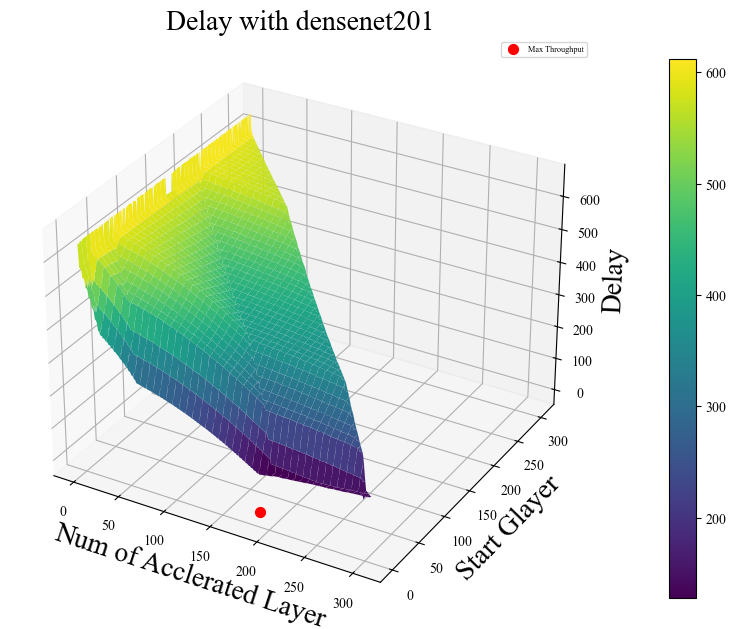

In [277]:
#print(data_df[('execution_time')])
#print(np.max(data_df[('execution_time')]))
#print(data_df[('execution_time')].max(axis=1), data_df[('execution_time')].idxmax(axis=1))

#print(np.min(data_df[('execution_time')]))
#print(data_df[('execution_time')].min(axis=1), data_df[('execution_time')].idxmin(axis=1))
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('execution_time')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Delay", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Delay with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
plt.show()

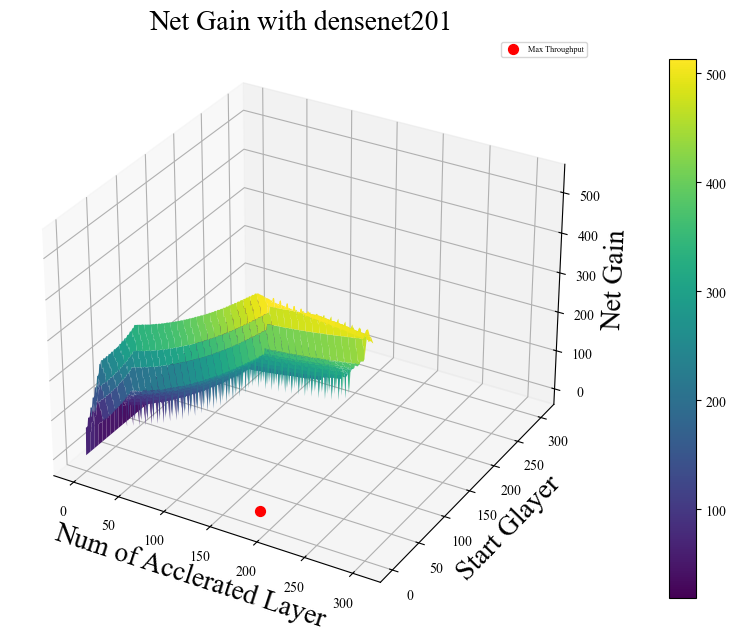

In [278]:
fig3 = plt.figure(figsize = (10, 10))
ax5 = fig3.add_subplot(111, projection='3d')
X = data_df.columns.get_level_values('end_glayer').unique()
Y = data_df.index.values
X, Y = np.meshgrid(X, Y)
Z = np.zeros_like(X, dtype=float)
Z_throughput = data_df[('accel_gain')] - data_df[('block_loss')]
surf = ax5.plot_surface(X, Y, Z_throughput, cmap='viridis')
ax5.set_xlabel("Num of Acclerated Layer", size=20)
ax5.set_ylabel("Start Glayer", size=20)
ax5.set_zlabel("Net Gain", size=20)
ax5.view_init(elev=30, azim=300)
ax5.scatter(list(max_values[0].values())[1], list(max_values[0].values())[0], 0, color='red', s=50, label="Max Throughput")
ax5.legend(loc='upper right', fontsize=6)
ax5.set_title(f"Net Gain with {model}", size=20)
cbar = plt.colorbar(surf, pad = 0.1, shrink=0.7)
plt.show()

end_glayer  0          1          2          3           4          5    \
glayer                                                                    
0           0.0  71.507566  73.643553  77.342368  100.272895  99.243092   

end_glayer         6           7           8           9    ...         297  \
glayer                                                      ...               
0           104.752829  127.560526  127.089868  131.880592  ...  606.838092   

end_glayer         298         299         300         301         302  \
glayer                                                                   
0           607.088158  607.066776  607.949145  608.354803  608.467763   

end_glayer         303         304         305         306  
glayer                                                      
0           615.476645  615.532895  615.260789  615.127829  

[1 rows x 307 columns]


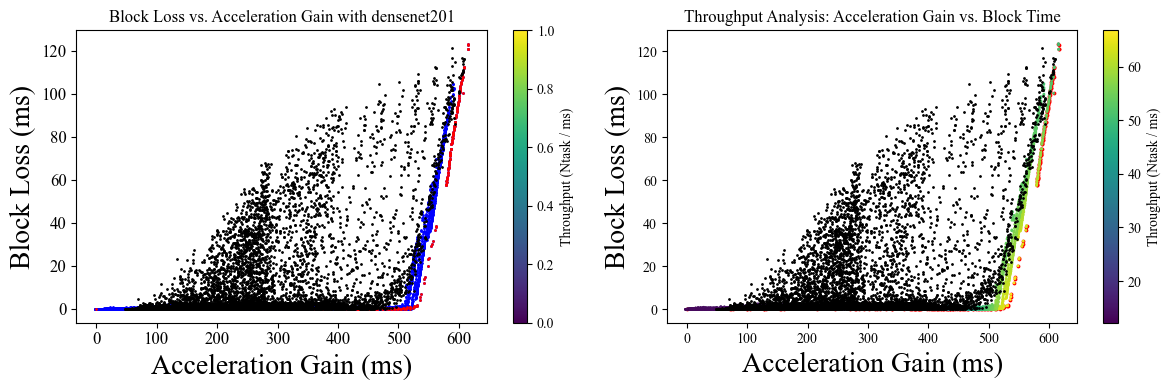

In [279]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

throughput_flat = data_df['throughput'].values.flatten()

color = colors[num_thread % len(colors)]
color_fill = colors_fill[num_thread]
    #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
#ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('execution_time',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('throughput',)], color='red', zorder = num_thread, s=3)
#scatter1 = ax1.scatter(data_df[('execution_time')], data_df[('throughput')], label=f"{num_thread} threads", c=throughput_flat, zorder = num_thread, s=1)
ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = 2, s=1)
ax1.scatter(data_df2[('accel_gain')], data_df2[('block_loss')], color='black', zorder =9, s=1)
scatter1 = ax1.scatter(data_df[('accel_gain')], data_df[('block_loss')], color='blue', zorder = 1, s=1)
ax2.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = num_thread, s=3)
ax2.scatter(data_df2[('accel_gain')], data_df2[('block_loss')], c='black', zorder = 9, s=1)
scatter2 = ax2.scatter(data_df[('accel_gain')], data_df[('block_loss')], c=throughput_flat, zorder = num_thread, s=1)
print(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)])
    # if (num_thread == 1) or (num_thread == 2) or (num_thread == num_total_cores):
    #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
    # else:
    #     exceed_num = cross_points[num_thread - 3]['glayer']
    #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


ax1.set_ylabel("Block Loss (ms)", size=20)
ax2.set_ylabel("Block Loss (ms)", size=20)
ax2.set_xlabel("Acceleration Gain (ms)", size = 20)
ax1.set_xlabel('Acceleration Gain (ms)', size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)
ax1.set_title(f"Block Loss vs. Acceleration Gain with {model}")
ax2.set_title("Throughput Analysis: Acceleration Gain vs. Block Time")
ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
fig.colorbar(scatter2, label="Throughput (Ntask / ms)")

plt.show()


# colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

# throughput_flat = data_df['throughput'].values.flatten()
# bubble_size = throughput_flat * 0.1
# color = colors[num_thread % len(colors)]
# color_fill = colors_fill[num_thread]
#     #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
# #ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('execution_time',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('throughput',)], color='red', zorder = num_thread, s=3)
# #scatter1 = ax1.scatter(data_df[('execution_time')], data_df[('throughput')], label=f"{num_thread} threads", c=throughput_flat, zorder = num_thread, s=1)
# #ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = 2, s=1)
# scatter1 = ax1.scatter(data_df[('accel_gain')], data_df[('block_loss')], color='blue', zorder = 1, s=1)
# #ax2.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = num_thread, s=3)
# scatter2 = ax2.scatter(data_df[('accel_gain')], data_df[('block_loss')], c=throughput_flat, zorder = num_thread, s=bubble_size)
# #print(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)])
#     # if (num_thread == 1) or (num_thread == 2) or (num_thread == num_total_cores):
#     #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
#     #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
#     # else:
#     #     exceed_num = cross_points[num_thread - 3]['glayer']
#     #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
#     #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


# ax1.set_ylabel("Block Loss (ms)", size=20)
# ax2.set_ylabel("Block Loss (ms)", size=20)
# ax2.set_xlabel("Acceleration Gain (ms)", size = 20)
# ax1.set_xlabel('Acceleration Gain (ms)', size=20)
# # ax2.set_ylabel('Minimum # of thread', size=20)
# ax1.set_title(f"Block Loss vs. Acceleration Gain with {model}")
# ax2.set_title("Throughput Analysis: Acceleration Gain vs. Block Time")
# ax1.tick_params(axis='both', labelsize=12)
# # ax2.tick_params(axis='both', labelsize=12)
# # ax3.tick_params(axis='both', labelsize=12)
# #ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
# #ax3.legend(loc='upper left', fontsize=3)
# #fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
# plt.tight_layout()
# fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
# fig.colorbar(scatter2, label="Throughput (Ntask / ms)")

# plt.show()


end_glayer  0          1          2          3           4          5    \
glayer                                                                    
0           0.0  71.507566  73.643553  77.342368  100.272895  99.243092   

end_glayer         6           7           8           9    ...         297  \
glayer                                                      ...               
0           104.752829  127.560526  127.089868  131.880592  ...  606.838092   

end_glayer         298         299         300         301         302  \
glayer                                                                   
0           607.088158  607.066776  607.949145  608.354803  608.467763   

end_glayer         303         304         305         306  
glayer                                                      
0           615.476645  615.532895  615.260789  615.127829  

[1 rows x 307 columns]


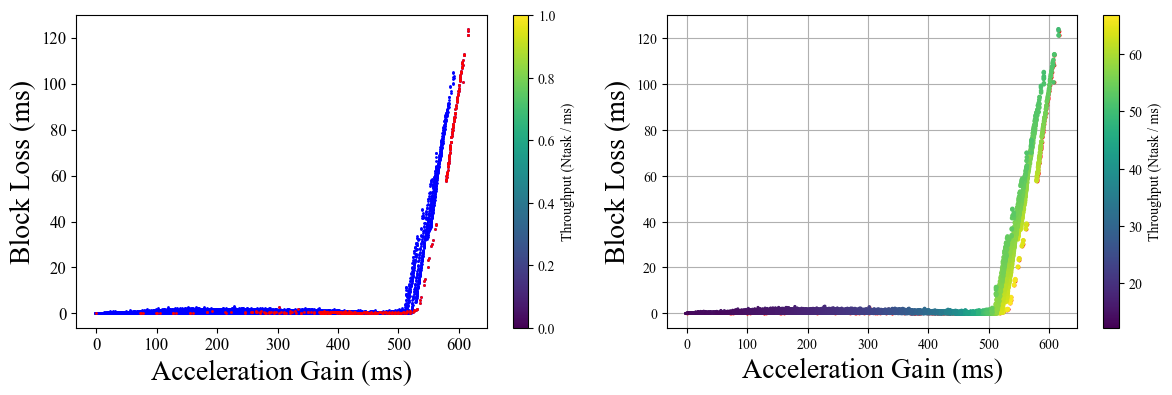

In [280]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

throughput_flat = data_df['throughput'].values.flatten()
bubble_size = throughput_flat * 0.1
color = colors[num_thread % len(colors)]
color_fill = colors_fill[num_thread]
    #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
#ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('execution_time',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('throughput',)], color='red', zorder = num_thread, s=3)
#scatter1 = ax1.scatter(data_df[('execution_time')], data_df[('throughput')], label=f"{num_thread} threads", c=throughput_flat, zorder = num_thread, s=1)
ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = 2, s=1)
scatter1 = ax1.scatter(data_df[('accel_gain')], data_df[('block_loss')], color='blue', zorder = 1, s=1, label="GPU-accel [0, M]")
ax2.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', zorder = num_thread, s=3)
scatter2 = ax2.scatter(data_df[('accel_gain')], data_df[('block_loss')], c=throughput_flat, zorder = num_thread, s=bubble_size)
print(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)])
    # if (num_thread == 1) or (num_thread == 2) or (num_thread == num_total_cores):
    #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
    # else:
    #     exceed_num = cross_points[num_thread - 3]['glayer']
    #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
    #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


ax1.set_ylabel("Block Loss (ms)", size=20)
ax2.set_ylabel("Block Loss (ms)", size=20)
ax2.set_xlabel("Acceleration Gain (ms)", size = 20)
ax1.set_xlabel('Acceleration Gain (ms)', size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)
# ax1.set_title(f"Block Loss vs. Acceleration Gain with {model}")
# ax2.set_title("Throughput Analysis: Acceleration Gain vs. Block Time")
ax1.tick_params(axis='both', labelsize=12)
plt.grid()
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
fig.colorbar(scatter2, label="Throughput (Ntask / ms)")

plt.show()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


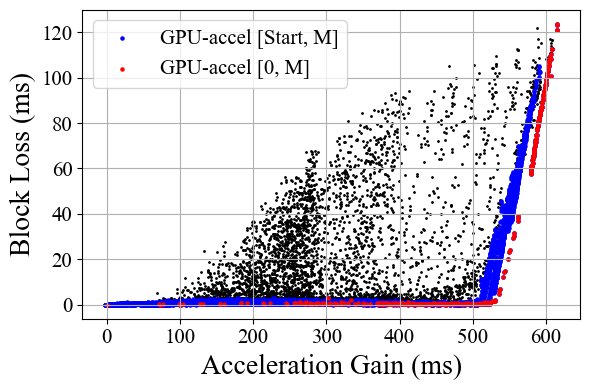

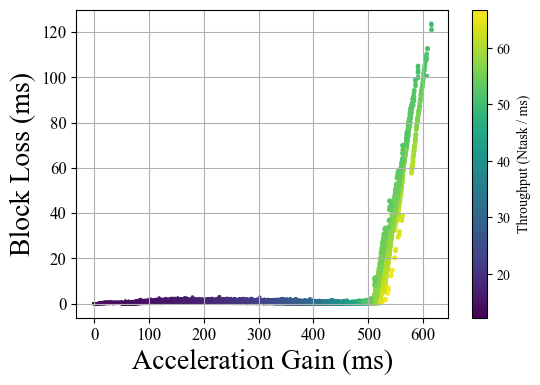

In [281]:
colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택

throughput_flat = data_df['throughput'].values.flatten()
throughput_flat2 = data_df2['throughput'].values.flatten()
bubble_size = throughput_flat * 0.1
color = colors[num_thread % len(colors)]
color_fill = colors_fill[num_thread]
    #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
#ax1.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('execution_time',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('throughput',)], color='red', zorder = num_thread, s=3)
#scatter1 = ax1.scatter(data_df[('execution_time')], data_df[('throughput')], label=f"{num_thread} threads", c=throughput_flat, zorder = num_thread, s=1)
# First Plot
plt.figure(figsize=(6, 4))
plt.scatter(data_df[('accel_gain')], data_df[('block_loss')], color='blue', s=5, label="GPU-accel [Start, M]")
plt.scatter(data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)], color='red', s=5, label="GPU-accel [0, M]")
plt.scatter(data_df2[('accel_gain')], data_df2[('block_loss')], color='black', zorder =0, s=1)
plt.xlabel('Acceleration Gain (ms)', size=20)
plt.ylabel('Block Loss (ms)', size=20)
plt.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.tight_layout()  # Adjust the layout to make the plot fit well
 
output_path = f'./output/1118/block_acccel_{model}.eps'
plt.savefig(output_path, format='eps', dpi=300)
output_path = f'./output/1118/block_acccel_{model}.png'
plt.savefig(output_path, format='png', dpi=300)
plt.show()

# Second Plot
plt.figure(figsize=(6, 4))
plt.scatter(data_df['accel_gain'], data_df['block_loss'], c=throughput_flat, s=bubble_size)
plt.xlabel('Acceleration Gain (ms)', size=20)
plt.ylabel('Block Loss (ms)', size=20)
plt.tick_params(axis='both', labelsize=12)
plt.colorbar(label="Throughput (Ntask / ms)")
plt.grid()
plt.show()



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


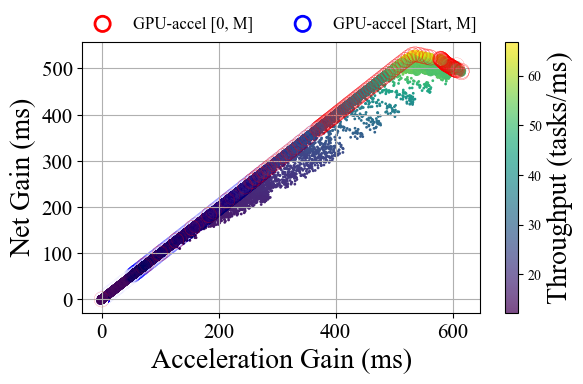

In [282]:
import matplotlib.pyplot as plt

# Adjusted data structure for plotting
fig, ax1 = plt.subplots(figsize=(6, 4))

# Create a scatter plot for "Net Gain"
ax1.scatter(data_df['accel_gain'], data_df['accel_gain'] - data_df['block_loss'], color='blue', zorder=1, s=1, label="Net Gain")

red_list = data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)] - data_df.loc[data_df.index.get_level_values('glayer') == 0, ('block_loss',)] 

# Add a heatmap-like representation of throughput using the scatter plot with colors based on throughput values
scatter_throughput = ax1.scatter(
    data_df['accel_gain'],
    data_df['accel_gain'] - data_df['block_loss'],
    c=throughput_flat,
    cmap='viridis',
    s=30,  # Adjust size for visibility
    alpha=0.7  # Add transparency for better heatmap effect
)
# Add blue bordered circles
blue_scatter = None  # To store the handle for the legend
blue_scatter = ax1.scatter(
            data_df[('accel_gain')], data_df['accel_gain'] - data_df['block_loss'], 
            facecolors='none',  # 채우지 않음
            edgecolors='blue',  # 테두리 색
            linewidths=0.0001,  # 테두리 두께
            s=120, 
            zorder=1
        )

# Add red bordered circles
red_scatter = None  # To store the handle for the legend
red_scatter = ax1.scatter(
       data_df.loc[data_df.index.get_level_values('glayer') == 0, ('accel_gain',)], red_list, 
        facecolors='none',  # 채우지 않음
        edgecolors='red',  # 테두리 색
        linewidths=0.1,  # 테두리 두께
        s=120, 
        zorder=2
    )

red_scatter =ax1.scatter([], [], facecolors='none',  # 채우지 않음
        edgecolors='red',  # 테두리 색
        linewidths=2,  # 테두리 두께
        s=120)
blue_scatter = ax1.scatter([], [], facecolors='none',  # 채우지 않음
            edgecolors='blue',  # 테두리 색
            linewidths=2,  # 테두리 두께
            s=120)
black_scatter = ax1.scatter(data_df2[('accel_gain')],data_df2[('accel_gain')]- data_df2[('block_loss')], c=throughput_flat2, zorder =0, s=1)

# Add legend for only red and blue circles
legend_elements = [
    red_scatter,  # Red-bordered circle
    blue_scatter  # Blue-bordered circle
]
legend_labels = [
    "GPU-accel [0, M]",  # Description for red
    "GPU-accel [Start, M]"  # Description for blue
]
ax1.legend(
    legend_elements, 
    legend_labels, 
    loc='upper center',  # Place legend at the top
    fontsize=12, 
    ncol=2,  # Arrange in 1 row (2 columns)
    frameon = False,
    bbox_to_anchor=(0.5, 1.15)  # Move legend outside the plot area
)

# Add color bar to indicate throughput values
cbar = plt.colorbar(scatter_throughput, ax=ax1)
cbar.set_label("Throughput (tasks/ms)", size=20)

# Setting labels and title
ax1.set_ylabel("Net Gain (ms)", size=20)
ax1.set_xlabel("Acceleration Gain (ms)", size=20)
# ax1.set_title("Net Gain vs. Acceleration Gain with Throughput", size=14)
ax1.tick_params(axis='both', labelsize=15)
ax1.grid()
plt.tight_layout()  # Adjust layout
output_path = f'./output/1118/Netgain_accel_{model}.eps'
plt.savefig(output_path, format='eps', dpi=300)
output_path = f'./output/1118/Netgain_accel_{model}.png'
plt.savefig(output_path, format='png', dpi=300)
plt.show()  # Display the plot


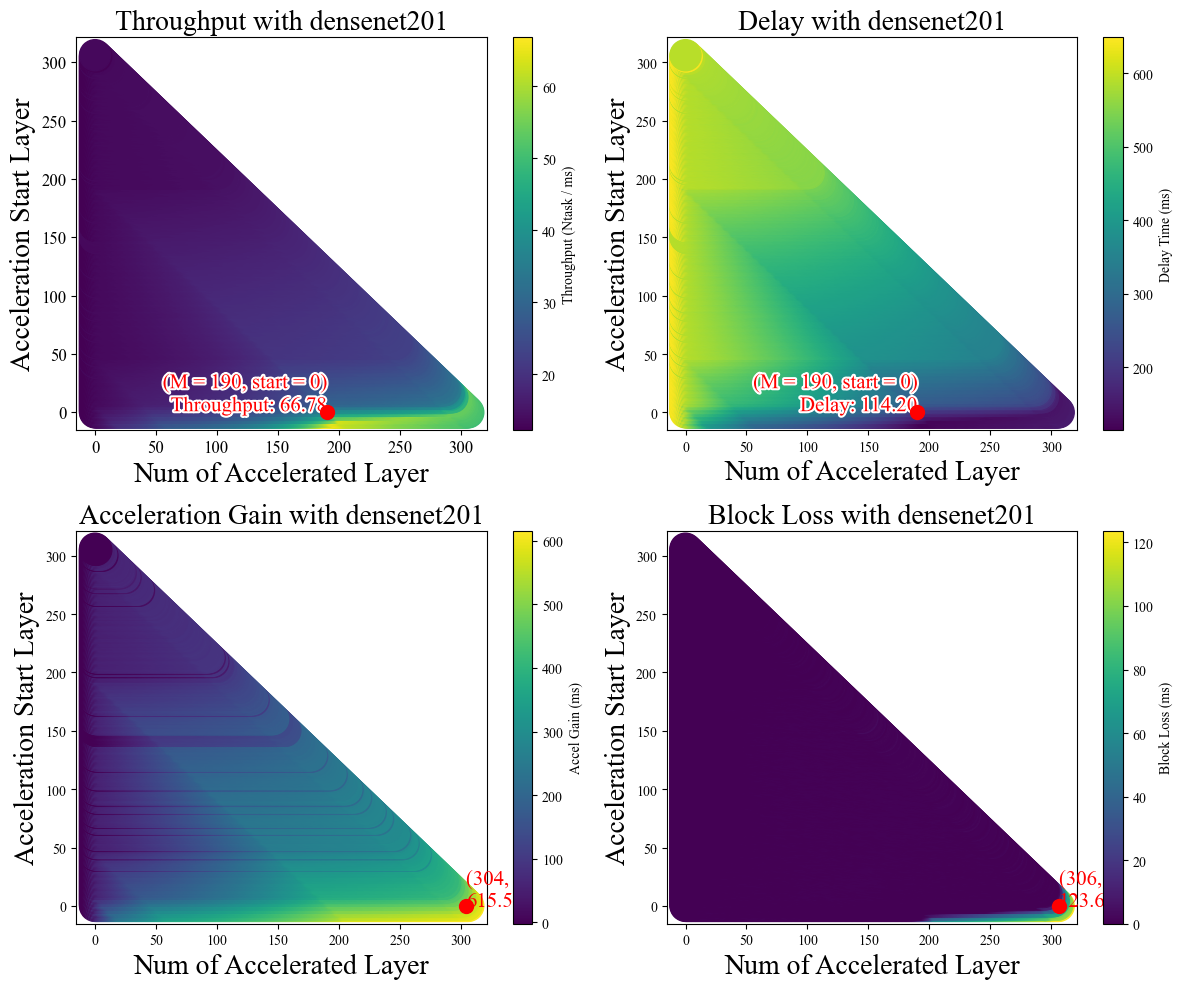

In [283]:
# Set up the plot
x=data_df.index.values
y=data_df.columns.get_level_values('end_glayer').unique()
X, Y = np.meshgrid(x, y)
x_flat = X.flatten()
y_flat = Y.flatten()

throughput_flat = data_df['throughput'].values.flatten()
delay_flat = data_df['execution_time'].values.flatten()
accel_gain_flat = data_df['accel_gain'].values.flatten()
block_loss_flat = data_df['block_loss'].values.flatten()

fig, ([ax1, ax2], [ax3, ax4])  = plt.subplots(2, 2, figsize=(12, 10))  # plt.subplots()로 수정
colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택
# 각 스레드에 대한 데이터 플롯
for num_thread in range(8, num_total_cores):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #ax1.scatter(data_df.index, data_df[('throughput'), a], label=f"{num_thread} threads", color=color, zorder = num_thread, s=1)
        scatter1 = ax1.scatter(x_flat, y_flat, c=throughput_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=500)
        scatter2 = ax2.scatter(x_flat, y_flat, c=delay_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=500)
        scatter3 = ax3.scatter(x_flat, y_flat, c=accel_gain_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=500)
        scatter4 = ax4.scatter(x_flat, y_flat, c=block_loss_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=500)
        max_throughput_idx = np.nanargmax(throughput_flat)
        ax1.scatter(x_flat[max_throughput_idx], y_flat[max_throughput_idx], color='red', marker='o', s=100, zorder = 100)
        max_delay_idx = np.nanargmin(delay_flat)
        ax2.scatter(x_flat[max_delay_idx], y_flat[max_delay_idx], color='red', marker='o', s=100, zorder = 100)
        max_accel_idx = np.nanargmax(accel_gain_flat)
        ax3.scatter(x_flat[max_accel_idx], y_flat[max_accel_idx], color='red', marker='o', s=100, zorder = 100)
        max_block_idx = np.nanargmax(block_loss_flat)
        ax4.scatter(x_flat[max_block_idx], y_flat[max_block_idx], color='red', marker='o', s=100, zorder = 100)
        # if (num_thread == 1) or (num_thread == 2) or (num_thread == num_total_cores):
        #     ax2.plot(data_df.index, data_df[('num_thread_data', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index, data_df[('num_thread_data', num_thread)], color=color_fill, zorder=num_thread)
        # else:
        #     exceed_num = cross_points[num_thread - 3]['glayer']
        #     ax2.plot(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #     ax2.fill_between(data_df.index[:exceed_num], data_df[('num_thread_data', num_thread)][:exceed_num], color=color_fill, zorder=num_thread)


# ax1.set_xlabel('# of layer with GPU inference', size=20)
# ax1.set_ylabel("Frame Rate (fps)", size=20)
# ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=4, frameon=False)

ax1.set_ylabel("Acceleration Start Layer", size=20)
ax2.set_ylabel("Acceleration Start Layer", size = 20)
ax3.set_ylabel("Acceleration Start Layer", size=20)
ax4.set_ylabel("Acceleration Start Layer", size = 20)
ax1.set_xlabel('Num of Accelerated Layer', size=20)
ax2.set_xlabel('Num of Accelerated Layer', size=20)
ax3.set_xlabel('Num of Accelerated Layer', size=20)
ax4.set_xlabel('Num of Accelerated Layer', size=20)
ax1.set_title(f"Throughput with {model}", size=20)
ax2.set_title(f"Delay with {model}", size=20)
ax3.set_title(f"Acceleration Gain with {model}", size=20)
ax4.set_title(f"Block Loss with {model}", size=20)
# ax2.set_ylabel('Minimum # of thread', size=20)

ax1.tick_params(axis='both', labelsize=12)
# ax2.tick_params(axis='both', labelsize=12)
# ax3.tick_params(axis='both', labelsize=12)
#ax1.legend(loc='lower center', bbox_to_anchor=(-0.3, 0.1), fontsize=6)
#ax3.legend(loc='upper left', fontsize=3)
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8)
plt.tight_layout()
fig.colorbar(scatter1, label="Throughput (Ntask / ms)")
fig.colorbar(scatter2, label="Delay Time (ms)")
fig.colorbar(scatter3, label="Accel Gain (ms)")
fig.colorbar(scatter4, label="Block Loss (ms)")
ax1.text(x_flat[max_throughput_idx], y_flat[max_throughput_idx]+1, f"(M = {x_flat[max_throughput_idx]}, start = {y_flat[max_throughput_idx]})\nThroughput: {throughput_flat[max_throughput_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='right').set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])
ax2.text(x_flat[max_delay_idx], y_flat[max_delay_idx]+1, f"(M = {x_flat[max_delay_idx]}, start = {y_flat[max_delay_idx]})\nDelay: {delay_flat[max_delay_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='right').set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])
ax3.text(x_flat[max_accel_idx], y_flat[max_accel_idx], f"({x_flat[max_accel_idx]}, {y_flat[max_accel_idx]})\n{accel_gain_flat[max_accel_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left')
ax4.text(x_flat[max_block_idx], y_flat[max_block_idx], f"({x_flat[max_block_idx]}, {y_flat[max_block_idx]})\n{block_loss_flat[max_block_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left')
plt.show()


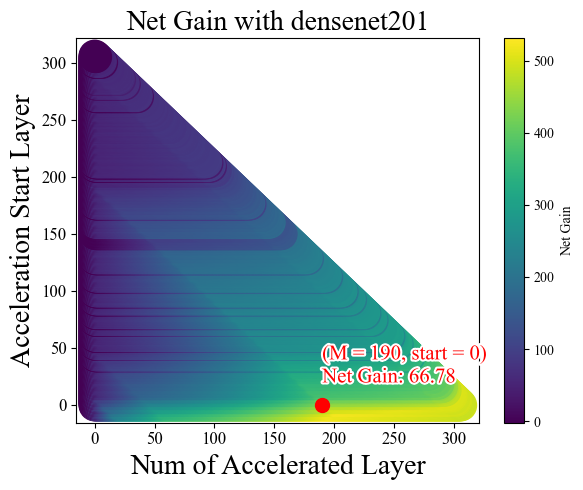

In [284]:
# Set up the plot
x=data_df.index.values
y=data_df.columns.get_level_values('end_glayer').unique()
X, Y = np.meshgrid(x, y)
x_flat = X.flatten()
y_flat = Y.flatten()

netgain_flat = data_df['accel_gain'].values.flatten() - data_df['block_loss'].values.flatten()


fig, ax1  = plt.subplots( figsize=(6, 5))  # plt.subplots()로 수정
colors = plt.cm.viridis(np.linspace(0, 1, num_total_cores))  # max_total_cores개의 색상을 viridis 컬러맵에서 선택
# 각 스레드에 대한 데이터 플롯
for num_thread in range(8, num_total_cores):
    color = colors[num_thread % len(colors)]
    color_fill = colors_fill[num_thread]
    if num_thread in data_df.columns.levels[1]:
        #ax1.plot(data_df.index, data_df[('frame_rate', num_thread)], label=f"{num_thread} threads", color=color, zorder = num_thread)
        #ax1.scatter(data_df.index, data_df[('throughput'), a], label=f"{num_thread} threads", color=color, zorder = num_thread, s=1)
        scatter1 = ax1.scatter(x_flat, y_flat, c=netgain_flat, cmap='viridis', label=f"{num_thread} threads", zorder = num_thread, s=500)
        max_throughput_idx = np.nanargmax(netgain_flat)
        ax1.scatter(x_flat[max_throughput_idx], y_flat[max_throughput_idx], color='red', marker='o', s=100, zorder = 100)
ax1.set_ylabel("Acceleration Start Layer", size=20)
ax1.set_xlabel('Num of Accelerated Layer', size=20)
ax1.set_title(f"Net Gain with {model}", size=20)
ax1.tick_params(axis='both', labelsize=12)

plt.tight_layout()
fig.colorbar(scatter1, label="Net Gain")

ax1.text(x_flat[max_throughput_idx], y_flat[max_throughput_idx]+20, f"(M = {x_flat[max_throughput_idx]}, start = {y_flat[max_throughput_idx]})\nNet Gain: {throughput_flat[max_throughput_idx]:.2f}", zorder=30, color='red', fontsize=15, ha='left').set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])

plt.show()


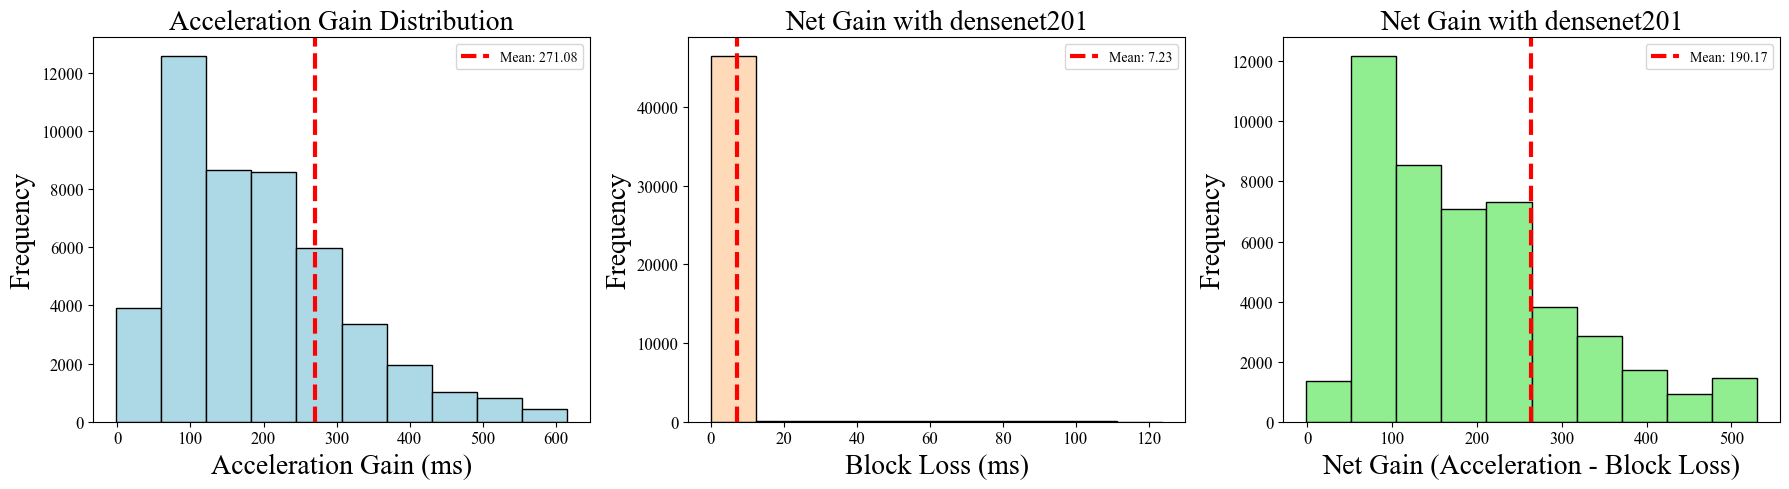

In [285]:
# Set up the plot
accel_gain_data = data_df['accel_gain']
block_loss_data = data_df['block_loss']
fig, (ax1, ax2, ax3)  = plt.subplots(1, 3, figsize=(18, 5))  # plt.subplots()로 수정
# 각 스레드에 대한 데이터 플롯
ax1.hist(accel_gain_data.values.flatten(), bins=10, color='lightblue', edgecolor='black')
ax1.set_xlabel("Acceleration Gain (ms)", size=20)
ax1.set_ylabel('Frequency', size=20)
ax1.set_title("Acceleration Gain Distribution", size=20)
ax1.tick_params(axis='both', labelsize=12)
ax1.axvline(x=data_df['accel_gain'].mean().mean(), color='red', linestyle='--', linewidth=3, label=f"Mean: {round(data_df['accel_gain'].mean().mean(), 2)}")  # x=2.5 위치에 점선 추가

ax2.hist(block_loss_data.values.flatten(), bins=10, color='peachpuff', edgecolor='black')
ax2.set_xlabel("Block Loss (ms)", size=20)
ax2.set_ylabel('Frequency', size=20)
ax2.set_title(f"Net Gain with {model}", size=20)
ax2.tick_params(axis='both', labelsize=12)
ax2.axvline(x=data_df['block_loss'].mean().mean(), color='red', linestyle='--', linewidth=3, label=f"Mean: {round(data_df['block_loss'].mean().mean(), 2)}")  # x=2.5 위치에 점선 추가

net_gain_data = accel_gain_data.values.flatten() - block_loss_data.values.flatten()
ax3.hist(net_gain_data, bins=10, color='lightgreen', edgecolor='black')
ax3.set_xlabel("Net Gain (Acceleration - Block Loss)", size=20)
ax3.set_ylabel('Frequency', size=20)
ax3.set_title(f"Net Gain with {model}", size=20)
ax3.tick_params(axis='both', labelsize=12)
ax3.axvline(x=data_df['accel_gain'].mean().mean() - data_df['block_loss'].mean().mean(), color='red', linestyle='--', linewidth=3, label=f"Mean: {round(np.nanmean(net_gain_data), 2)}")  # x=2.5 위치에 점선 추가

plt.tight_layout()
fig.colorbar(scatter1, label="Net Gain")
ax1.legend()
ax2.legend()
ax3.legend()

plt.show()
